<a href="https://colab.research.google.com/github/FranciscoBenvindo/alura-git/blob/main/Introdu%C3%A7%C3%A3o_a_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv("movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes.columns = ["filmeId","título","gêneros"]

In [4]:
filmes.head()

,filmeId,título,gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1.225735e+09
1,1,110,4.0,1.225865e+09
2,1,158,4.0,1.225734e+09
3,1,260,4.5,1.225735e+09
4,1,356,5.0,1.225735e+09


In [8]:
notas.columns =["usuárioId","filmeId","nota","momento"]
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,1.225735e+09
1,1,110,4.0,1.225865e+09
2,1,158,4.0,1.225734e+09
3,1,260,4.5,1.225735e+09
4,1,356,5.0,1.225735e+09


In [9]:
notas.describe()

,usuárioId,filmeId,nota,momento
count,610900.000000,610900.000000,610899.000000,6.108990e+05
mean,3000.599925,26894.421129,3.528695,1.264137e+09
std,1669.573050,48165.016127,1.067046,2.521627e+08
min,1.000000,1.000000,0.500000,8.254319e+08
25%,1595.000000,1214.000000,3.000000,1.046488e+09
50%,3049.000000,3185.000000,3.500000,1.245144e+09
75%,4414.000000,33794.000000,4.000000,1.489998e+09
max,5909.000000,288563.000000,5.000000,1.689838e+09


## **Primeira Tentativa de Recomendação**

In [10]:
filmes = filmes.set_index("filmeId")

In [11]:
filmes.head()

,título,gêneros
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [13]:
filmes.loc[318]

título     Shawshank Redemption, The (1994)
gêneros                         Crime|Drama
Name: 318, dtype: object

In [14]:
notas["filmeId"].value_counts()

318       2226
356       2030
2571      1968
296       1947
593       1863
          ... 
5966         1
5674         1
3184         1
202711       1
44815        1
Name: filmeId, Length: 19934, dtype: int64

In [15]:
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,1.225735e+09
1,1,110,4.0,1.225865e+09
2,1,158,4.0,1.225734e+09
3,1,260,4.5,1.225735e+09
4,1,356,5.0,1.225735e+09


In [19]:
notas["usuárioId"].value_counts()

4605    3534
4880    3438
2402    2882
5889    2668
4249    2609
        ... 
2104       1
4562       1
83         1
1282       1
4347       1
Name: usuárioId, Length: 5909, dtype: int64

In [25]:
total_de_usuarios = notas["usuárioId"].value_counts()
total_de_usuarios.head()

4605    3534
4880    3438
2402    2882
5889    2668
4249    2609
Name: usuárioId, dtype: int64

In [20]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

318     2226
356     2030
2571    1968
296     1947
593     1863
Name: filmeId, dtype: int64

In [21]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,título,gêneros,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1383.0
2,Jumanji (1995),Adventure|Children|Fantasy,515.0
3,Grumpier Old Men (1995),Comedy|Romance,278.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,36.0
5,Father of the Bride Part II (1995),Comedy,290.0


In [23]:
filmes.sort_values("total_de_votos", ascending = False)

,título,gêneros,total_de_votos
filmeId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,2226.0
356,Forrest Gump (1994),Comedy|Drama|Romance|War,2030.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1968.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1947.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1863.0
...,...,...,...
288967,State of Siege: Temple Attack (2021),Action|Drama,NaN
288971,Ouija Japan (2021),Action|Horror,NaN
288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,NaN


In [24]:
filmes.head


<bound method NDFrame.head of                                                     título  \
filmeId                                                      
1                                         Toy Story (1995)   
2                                           Jumanji (1995)   
3                                  Grumpier Old Men (1995)   
4                                 Waiting to Exhale (1995)   
5                       Father of the Bride Part II (1995)   
...                                                    ...   
288967                State of Siege: Temple Attack (2021)   
288971                                  Ouija Japan (2021)   
288975    The Men Who Made the Movies: Howard Hawks (1973)   
288977                     Skinford: Death Sentence (2023)   
288983   UNZIPPED: An Autopsy of American Inequality (2...   

                                             gêneros  total_de_votos  
filmeId                                                               
1        Adventure|An

In [30]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias.head()


filmeId
1    3.858641
2    3.273786
3    3.133574
4    3.152778
5    3.150000
Name: nota, dtype: float64

In [31]:
filmes["nota_media"]= notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(20)

,título,gêneros,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,2226.0,4.400045
356,Forrest Gump (1994),Comedy|Drama|Romance|War,2030.0,4.041379
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1968.0,4.154980
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1947.0,4.204417
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1863.0,4.130166
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1767.0,4.070741
2959,Fight Club (1999),Action|Crime|Drama|Thriller,1564.0,4.245524
527,Schindler's List (1993),Drama|War,1563.0,4.207933
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1491.0,3.669685


### **Uma segunda heurística**

In [32]:
filmes.sort_values("nota_media", ascending = False).head(20)

,título,gêneros,total_de_votos,nota_media
filmeId,,,,
158266,The Battle of Chile - Part 3 (1979),Documentary,1.0,5.0
116742,Secret (2007),Drama|Fantasy|Romance,2.0,5.0
193481,Rangasthalam (2018),Action|Drama,1.0,5.0
193201,RX 100 (2018),Action|Drama|Romance,1.0,5.0
139098,Four Days in October (2010),Documentary,1.0,5.0
139327,Heaven Adores You (2014),Documentary,1.0,5.0
192713,Compulsion (2018),Fantasy|Horror|Thriller,1.0,5.0
139499,Camp Belvidere (2014),(no genres listed),1.0,5.0
139620,Everything's Gonna Be Great (1998),Adventure|Children|Comedy|Drama,1.0,5.0


In [33]:
filmes.query("total_de_votos >=10").sort_values("nota_media", ascending = False).head(20)

,título,gêneros,total_de_votos,nota_media
filmeId,,,,
286897,Spider-Man: Across the Spider-Verse (2023),Action|Adventure|Animation|Sci-Fi,10.0,4.650000
26578,"Sacrifice, The (Offret - Sacraficatio) (1986)",Drama,10.0,4.550000
6123,Sunless (Sans Soleil) (1983),Documentary,13.0,4.538462
159817,Planet Earth (2006),Documentary,52.0,4.519231
170705,Band of Brothers (2001),Action|Drama|War,49.0,4.510204
171495,Cosmos,(no genres listed),13.0,4.500000
171011,Planet Earth II (2016),Documentary,41.0,4.500000
2330,Hands on a Hard Body (1996),Comedy|Documentary,20.0,4.500000
2920,Children of Paradise (Les enfants du paradis) ...,Drama|Romance,27.0,4.500000


In [34]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >=50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending=False).head()

,título,gêneros,total_de_votos,nota_media
filmeId,,,,
159817,Planet Earth (2006),Documentary,52.0,4.519231
318,"Shawshank Redemption, The (1994)",Crime|Drama,2226.0,4.400045
858,"Godfather, The (1972)",Crime|Drama,1410.0,4.308156
5008,Witness for the Prosecution (1957),Drama|Mystery|Thriller,52.0,4.307692
202439,Parasite (2019),Comedy|Drama,224.0,4.285714


In [35]:
  eu_assisti = [1,21,19,10,11,7,2]
  filmes.loc[eu_assisti]

,título,gêneros,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1383.0,3.858641
21,Get Shorty (1995),Comedy|Crime|Thriller,460.0,3.516304
19,Ace Ventura: When Nature Calls (1995),Comedy,488.0,2.684426
10,GoldenEye (1995),Action|Adventure|Thriller,649.0,3.469183
11,"American President, The (1995)",Comedy|Drama|Romance,368.0,3.660326
7,Sabrina (1995),Comedy|Romance,294.0,3.309524
2,Jumanji (1995),Adventure|Children|Fantasy,515.0,3.273786


In [38]:
filmes.query("gêneros=='Adventure|Children|Fantasy'").sort_values("nota_media", ascending = False).head(20)

,título,gêneros,total_de_votos,nota_media
filmeId,,,,
80748,Alice in Wonderland (1933),Adventure|Children|Fantasy,1.0,4.500000
189473,"Red, Honest, in Love (1984)",Adventure|Children|Fantasy,1.0,4.500000
173873,Gulliver's Travels (1996),Adventure|Children|Fantasy,2.0,3.750000
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,682.0,3.700880
50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,53.0,3.584906
280890,Slumberland (2022),Adventure|Children|Fantasy,1.0,3.500000
157365,Old Man Khottabych (1956),Adventure|Children|Fantasy,1.0,3.500000
175263,Snow White: The Fairest of Them All (2001),Adventure|Children|Fantasy,1.0,3.500000
101170,"Borrowers, The (2011)",Adventure|Children|Fantasy,1.0,3.500000


In [40]:
aventura_infantil_e_fantasia =filmes_com_mais_de_50_votos.query("gêneros=='Adventure|Children|Fantasy'").sort_values("nota_media", ascending = False).head(20)

In [41]:
aventura_infantil_e_fantasia.head(10)

,título,gêneros,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,682.0,3.700880
50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,53.0,3.584906
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,251.0,3.436255
82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,58.0,3.396552
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,312.0,3.352564
2,Jumanji (1995),Adventure|Children|Fantasy,515.0,3.273786
56171,"Golden Compass, The (2007)",Adventure|Children|Fantasy,93.0,3.252688
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,85.0,3.223529
1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,54.0,3.212963


In [42]:
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').head()

,título,gêneros,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,682.0,3.700880
50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,53.0,3.584906
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,251.0,3.436255
82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,58.0,3.396552
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,312.0,3.352564


## **Collaborative filtering x Content based filtering**


In [ ]:
  # joão = [4, 4.5]
  # maria = [5,5]

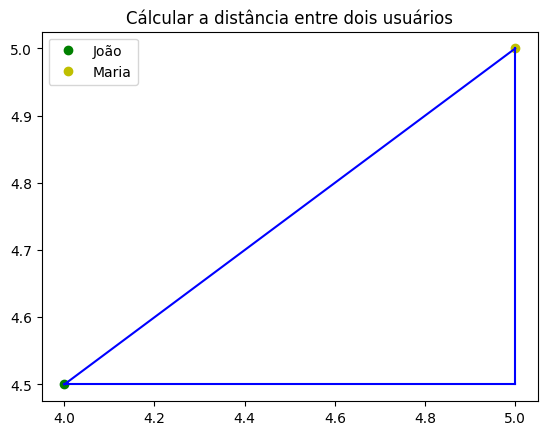

In [46]:
import matplotlib.pyplot as plt
plt.plot (4, 4.5, "go")
plt.plot (5,5, "yo")
plt.legend(["João","Maria"])
plt.title("Cálcular a distância entre dois usuários")

plt.plot ([4,5], [4.5,4.5], color="b", linestyle ="-")
plt.plot ([4,5], [4.5,5], color="b", linestyle ="-")
plt.plot ([5,5], [4.5,5], color="b", linestyle ="-")

In [47]:
import numpy as np
joão = np.array ([4, 4.5])
maria = np.array ([5,5])
joão - maria

array([-1. , -0.5])

In [49]:
from math import sqrt


In [51]:
np.linalg.norm(joão - maria)

1.118033988749895

In [52]:
def pitagoras (a,b):
  return np.linalg.norm(a-b)


In [53]:
pitagoras(joão, maria)

1.118033988749895

Text(0.5, 1.0, 'Cálcular a distância entre três usuários')

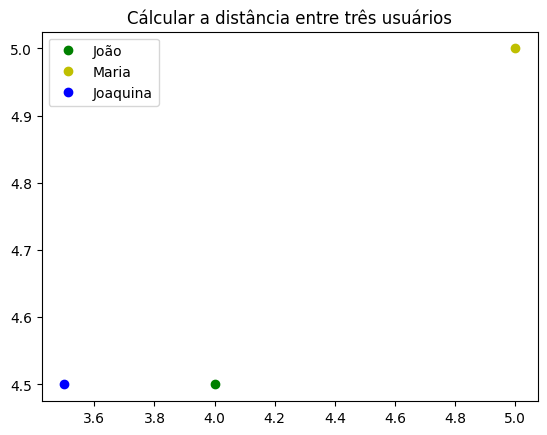

In [54]:
import matplotlib.pyplot as plt
plt.plot (4, 4.5, "go")
plt.plot (5,5, "yo")
plt.plot(3.5,4.5, "bo")
plt.legend(["João","Maria", "Joaquina"])
plt.title("Cálcular a distância entre três usuários")


In [57]:
joaquina = np.array([3.5,4.5])
print(pitagoras(joão, maria))
print(pitagoras(joão, joaquina))
print(pitagoras(maria, joaquina))


1.118033988749895
0.5
1.5811388300841898


In [59]:
def distancia(a,b):
  return np.linalg.norm(a-b)
